<a href="https://colab.research.google.com/github/CharlyPierce/Clustering/blob/main/proy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Clustering 
1:El objetivo es agrupar los datos que presenten ciertas semejanzas entre sus miembros es decir que  se parescan.$$$$
2:Buscamos los datos que pertenezcan a grupos diferentes tengan rasgos los suficientemente diferentes entre si.$$$$
##Matemáticas del cluster
Para abordar el problema de cluster se necesita medir la diferencia o semejanza de las observaciones, una buena herrmienta para abordar este problema son las metricas.
Sea un punto N el número de observaciones a considerar y n alguna valoracion para esa observación podemos denotar los conjuntos dados por:
$$X={{\{x_i\}}^N_{i=1}}$$
$$donde$$
$$x_i=({x_i}_1,{x_i}_2,{x_i}_3,{x_i}_n)$$
$$y$$
$$Y={{\{y_j\}}^N_{j=1}}$$
$$donde$$
$$y_j=({y_j}_1,{y_j}_2,{y_j}_3,{y_j}_n)$$
Sea el espacio metrico euclideo de todas las nuplas de números reales X, Y, definimos la distancia como:
$$d(x_i,y_j)=\sqrt{\sum_{k=1}^n{(x_{ik}-y_{jk})^2}}$$
podemos verificar que se cumplen los 3 axiomas de espacio métrico.
$$i)\ d(x,y)\geq0$$
$$ii)\ d(x,y)=d(y,x)$$
$$iii)\ d(x,z)\leq d(x,y)+d(y,z)$$
para i )
$$d(x,y)\geq0 $$
dado que $$(x_{ik}-y_{jk})^2 \geq 0$$
se cumple i$$$$
para ii)
$$d(x_i,y_j)=\sqrt{\sum_{k=1}^n{(x_{ik}-y_{jk})^2}}=
\sqrt{\sum_{k=1}^n{((-1)(y_{jk}-x_{ik}))^2}}=
\sqrt{\sum_{k=1}^n{(y_{jk}-x_{ik})^2}}=
d(y_j,x_i)$$
$$$$
para iii)
$$d(x_i,y_j)=\sqrt{\sum_{k=1}^n{|x_{ik}-y_{jk}|^2}}=
\sqrt{\sum_{k=1}^n{|x_{ik}-z|^2}}+
\sqrt{\sum_{k=1}^n{(z-y_{jk})^2}}=
d(x_i,z)+d(z,y_j)$$
$$Si$$$$ \ x_{ik}-z=a_k$$ $$ z-y_{jk}=b_k$$
$$entonces \\ x_{ik}-y_{jk}=a_k-b_k$$
podemos reecribir como
$$1: \ \sqrt{\sum_{k=1}^n{(a_k+b_k)^2}} \leq 
\sqrt{\sum_{k=1}^n{a_k^2}}+\sqrt{\sum_{k=1}^n{b_k^2}} \\
Esto\ por\ la\ desigualdad\ de\ cauchy-Schwarz $$
$$ \left(\sum_{k=1}^n a_k*b_k \right)^2 \leq 
\sum_{k=1}^n a_k^2*\sum_{k=1}^n b_k^2$$
Usando la desigualdad Cauchy-Schwarz
$${\sum_{k=1}^n{(a_k+b_k)^2}}=
\sum_{k=1}^na_k^2+2\sum_{k=1}^na_k*b_k+\sum_{k=1}^nb_k^2 \leq \sum_{k=1}^na_k^2+2\sqrt {\sum_{k=1}^na_k^2*\sum_{k=1}^nb_k^2}+\sum_{k=1}^nb_k^2=
\left(\sqrt{\sum_{k=1}^na_k^2}+\sqrt{ \sum_{k=1}^nb_k^2}\right)^2$$
sustituyendo en 1
$$1: \ \sqrt{\sum_{k=1}^n{(a_k+b_k)^2}} \leq
\sqrt {\left(\sqrt{\sum_{k=1}^na_k^2}+\sqrt{ \sum_{k=1}^nb_k^2}\right)^2}
=
\sqrt{\sum_{k=1}^n{a_k^2}}+\sqrt{\sum_{k=1}^n{b_k^2}}$$
Demostrando así el axioma 3

#Ejemplo Practico
Se presenta una tabla de datos dónde se registraron las compras al cabo de un año de usuarios suscritos a una targeta brindada por la empresa, y el salario anual de cada usuario.
El proposito es segmentar los datos para obtener informacion de compras de cada usuario.

In [ ]:
dse=pd.read_csv('Mall_Customers.csv')
ds=dse
ds.head(1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [ ]:
x=ds.iloc[:,3:5].values
nc=['Ingreso_anual_en_miles_de_dolares','Puntuacion_de_compras']

In [ ]:
pd.DataFrame(x,columns=nc)

,Ingreso_anual_en_miles_de_dolares,Puntuacion_de_compras
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5,init='k-means++')

In [ ]:
y_pred=km.fit_predict(x)

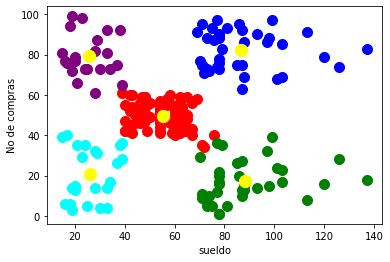

In [ ]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='green',label='cluster 3')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100,c='purple',label='cluster 4')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=100,c='cyan',label='cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=150,c='yellow',label='var ')
plt.xlabel('sueldo')
plt.ylabel('No de compras')
plt.show()

In [ ]:
import random

Para ejemplificar el proceso de los clusters se daran algunos puntos en los que se puede apreciar que se pueden segmentar en 3 grupos.
Dado los siguientes puntos
$$
(\ x, \ y)\\
[-1.0, -2.0]\\
[-0.5, -1.5]\\
[-1.0, -1.5]\\
[-0.5, -1.7]\\
[\ 1.0, -1.7]\\
[\ 1.5, -1.2]\\
[\ 1.0,  1.5]\\
[\ 1.5,  1.6]\\
[\ 2.0,  1.5]\\
[\ 1.5,  1.4]\\
[\ 1.7,  1.8]$$
Para cada punto se calcula la distancia con respecto a los demas y se obtiene el más pequeño, el cual será el primer cluster.
$$d(x_i,y_i)=min\left(\sqrt{(x_{i2}-x_{i1})^2+(y_{i2}-y_{i1})^2}\right)$$

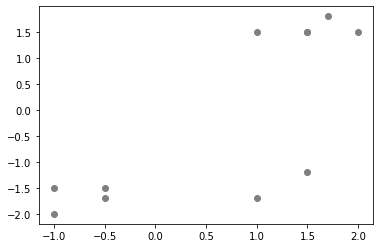

<Figure size 432x288 with 0 Axes>

In [ ]:
x1=[-1.0,-0.5,-1.0,-0.5,1,1.5,1,1.5,2,1.5,1.7]
y1=[-2.0,-1.5,-1.5,-1.7,-1.7,-1.2,1.5,1.5,1.5,1.5,1.8]
plt.scatter(x1,y1,c='gray')
plt.show()
plt.savefig('sn_c.png')

Ocupando una función en python podemos calcular una matriz simetrica con ceros en la diagonal, con las distancias a cada punto.

In [ ]:
pd.DataFrame(dd)

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.707107,0.500000,0.583095,2.022375,2.624881,4.031129,4.382921,4.609772,4.220190,4.661545
1,0.707107,0.000000,0.500000,0.200000,1.513275,2.022375,3.354102,3.689173,3.905125,3.522783,3.966106
2,0.500000,0.500000,0.000000,0.538516,2.009975,2.517936,3.605551,3.982462,4.242641,3.828838,4.263801
3,0.583095,0.200000,0.538516,0.000000,1.500000,2.061553,3.534119,3.858756,4.060788,3.689173,4.134005
4,2.022375,1.513275,2.009975,1.500000,0.000000,0.707107,3.200000,3.337664,3.352611,3.140064,3.569314
5,2.624881,2.022375,2.517936,2.061553,0.707107,0.000000,2.745906,2.800000,2.745906,2.600000,3.006659
6,4.031129,3.354102,3.605551,3.534119,3.200000,2.745906,0.000000,0.509902,1.000000,0.509902,0.761577
7,4.382921,3.689173,3.982462,3.858756,3.337664,2.800000,0.509902,0.000000,0.509902,0.200000,0.282843
8,4.609772,3.905125,4.242641,4.060788,3.352611,2.745906,1.000000,0.509902,0.000000,0.509902,0.424264
9,4.220190,3.522783,3.828838,3.689173,3.140064,2.600000,0.509902,0.200000,0.509902,0.000000,0.447214


$$La\  mínima\  distancia\  se\  encuentra\  en\  M_{13}, sin\ contar\ la\ diagonal\ $$

Entonces el primer cluster se encontrara en los pares ordenados 
$$(x,y) \\ [-0.5, -1.5] \\ [-0.5, -1.7] \\ $$
Ahora se calcula el punto medio y las dos coordenadas anteriores se sustituyen por el punto medio para buscar el nuevo cluster.
Esto se repite hasta encontrar un número adecuado de clusters.

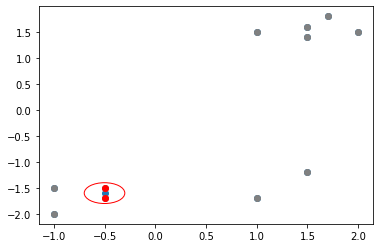

In [ ]:
f=ar(dd)
xy=nu(z1,f)
c=ag(xy,f,z1)
gr(c,z1,f,0.2,x1,y1)

El segundo cluster encontrado

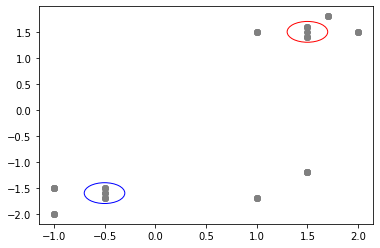

In [ ]:
def gr1(c,z1,f,r,x1,y1,co):
  plt.scatter(c[:,0],c[:,1],c='gray')
  plt.scatter(x1,y1,c='gray')
  plt.scatter(z1[int(f[0]),0],z1[int(f[0]),1],c='gray')
  plt.scatter(z1[int(f[1]),0],z1[int(f[1]),1],c='gray')
  c1=plt.Circle((c[-1,0],c[-1,1]),r,color=co,fill=False)
  ax = plt.gca()
  ax.add_artist(c1) 
f=ar(dd)
xy=nu(z1,f)
c=ag(xy,f,z1)
gr1(c,z1,f,0.2,x1,y1,'blue')
gr1(c1,c,f,0.2,x1,y1,'red')

Al final lo datos se pueden agrupar en tres grupos o cluster.

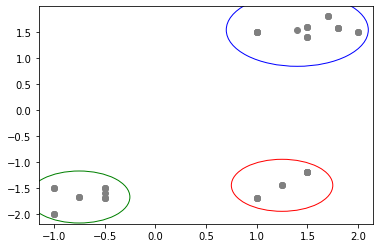

In [ ]:
f=ar(dd)
xy=nu(z1,f)
c=ag(xy,f,z1)
gr1(c7,c6,f,0.7,x1,y1,'blue')
gr1(c6,c5,f,0.5,x1,y1,'red')
gr1(c5,c4,f,0.5,x1,y1,'green')

In [ ]:
x1=[-1.0,-0.5,-1.0,-0.5,1,1.5,1,1.5,2,1.5,1.7]
y1=[-2.0,-1.5,-1.5,-1.7,-1.7,-1.2,1.5,1.5,1.5,1.5,1.8]
z=np.array([x1,y1])
z1=z.T
dd=distance_matrix(z1,z1,p=2)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km1=KMeans(n_clusters=3,init='k-means++')

In [ ]:
z1=z.T

In [ ]:
z1

array([[-1. , -2. ],
       [-0.5, -1.5],
       [-1. , -1.5],
       [-0.5, -1.7],
       [ 1. , -1.7],
       [ 1.5, -1.2],
       [ 1. ,  1.5],
       [ 1.5,  1.6],
       [ 2. ,  1.5],
       [ 1.5,  1.4],
       [ 1.7,  1.8]])

In [ ]:
y_p=km1.fit_predict(z1)

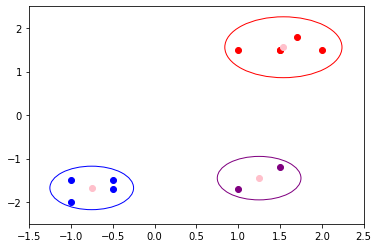

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(z1[y_p==0,0],z1[y_p==0,1],c='red')
plt.scatter(z1[y_p==1,0],z1[y_p==1,1],c='blue')
plt.scatter(z1[y_p==2,0],z1[y_p==2,1],c='purple')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],c='pink')
plt.xlim(-1.5,2.5)
plt.ylim(-2.5,2.5)
circle1=plt.Circle((km1.cluster_centers_[0,0],km1.cluster_centers_[0,1]),.7,color='r',fill=False) 
circle2=plt.Circle((km1.cluster_centers_[1,0],km1.cluster_centers_[1,1]),.5,color='b',fill=False) 
circle3=plt.Circle((km1.cluster_centers_[2,0],km1.cluster_centers_[2,1]),.5,color='purple',fill=False) 
ax = plt.gca()
ax.add_artist(circle1) 
ax.add_artist(circle2) 
ax.add_artist(circle3)
plt.show()
plt.savefig('cn_c.png')

In [ ]:
from scipy.spatial import distance_matrix


In [ ]:
x1=[-1.0,-0.5,-1.0,-0.5,1,1.5,1,1.5,2,1.5,1.7]
y1=[-2.0,-1.5,-1.5,-1.7,-1.7,-1.2,1.5,1.5,1.5,1.5,1.8]
z=np.array([x1,y1])
z1=z.T
dd=distance_matrix(z1,z1,p=2)

In [ ]:
dd=distance_matrix(z1,z1,p=2)

$$d(x_i,y_j)=\sqrt{\sum_{k=1}^n{(x_{ik}-y_{jk})^2}}$$

In [ ]:
z1#puntos en el plano cartesiano

array([[-1. , -2. ],
       [-0.5, -1.5],
       [-1. , -1.5],
       [-0.5, -1.7],
       [ 1. , -1.7],
       [ 1.5, -1.2],
       [ 1. ,  1.5],
       [ 1.5,  1.5],
       [ 2. ,  1.5],
       [ 1.5,  1.5],
       [ 1.7,  1.8]])

In [ ]:
x11=-1.0
y11=-2.0
x22=-1
y22=-1.5###puntos en z1[0]=(-1,-2)  y z1[2]=(-1,-1.5)
np.sqrt((x22-x11)**2+(y22-y11)**2)#lo buscamos en dd como 0,2 o 2,0

0.5

In [ ]:
pd.DataFrame(dd).head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.707107,0.5,0.583095,2.022375,2.624881,4.031129,4.301163,4.609772,4.301163,4.661545
1,0.707107,0.000000,0.5,0.200000,1.513275,2.022375,3.354102,3.605551,3.905125,3.605551,3.966106
2,0.500000,0.500000,0.0,0.538516,2.009975,2.517936,3.605551,3.905125,4.242641,3.905125,4.263801


In [ ]:
#primer cluster
#[-0.5,-1.5]
#[-0.5,-1.7]
dd.shape[0]

11

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
from scipy.spatial import distance_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x1=[-1.0,-0.5,-1.0,-0.5,1,1.5,1,1.5,2,1.5,1.7]
y1=[-2.0,-1.5,-1.5,-1.7,-1.7,-1.2,1.5,1.6,1.5,1.4,1.8]
z=np.array([x1,y1])
z1=z.T
dd=distance_matrix(z1,z1,p=2)

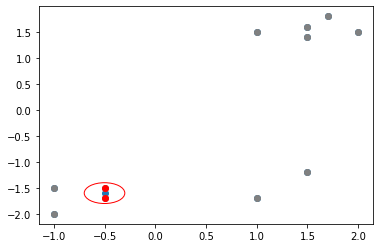

In [ ]:
def ar(dd):#matriz de distancias
  min_v=[]
  indi=[]
  indk=[]
  for i in range(dd.shape[0]):
    mi=10000
    ag=0
    for k in range(dd.shape[0]):
      if(dd[i,k]!=0 and dd[i,k]<mi):
        mi=dd[i,k]
        ag=k
    min_v.append(dd[i,ag])
    indi.append(i)
    indk.append(ag)
  v1=np.array([indi,indk,min_v]).T
  m=1000
  for i in range(dd.shape[0]):
    if(v1[i,2]<m):
      m=v1[i,2]
      ind=i
  z=np.array([v1[ind,0],v1[ind,1],v1[ind,2]])
  return z
#calculando nuevo punto
def nu(z1,f):
  x_1=z1[int(f[0]),0]
  y_1=z1[int(f[0]),1]
  x_2=z1[int(f[1]),0]
  y_2=z1[int(f[1]),1]
  x__n=(x_1+x_2)/2
  y__n=(y_1+y_2)/2
  xy=np.array([x__n,y__n]).reshape(-1,2)
  return xy
#agregar nuevo punto
def ag(xy,f,z1):
  a=xy.tolist()
  b=z1.tolist()
  if(f[0]<f[1]):
    b.pop(int(f[0]))
    b.pop(int(f[1])-1)
  else:
    b.pop(int(f[0]))
    b.pop(int(f[1]))
  c=b+a
  c=np.array(c)
  return c
#grafico
def gr(c,z1,f,r,x1,y1):
  plt.scatter(c[:,0],c[:,1])
  plt.scatter(x1,y1,c='gray')
  plt.scatter(z1[int(f[0]),0],z1[int(f[0]),1],c='r')
  plt.scatter(z1[int(f[1]),0],z1[int(f[1]),1],c='r')
  c1=plt.Circle((c[-1,0],c[-1,1]),r,color='r',fill=False)
  ax = plt.gca()
  ax.add_artist(c1) 
  plt.show()
f=ar(dd)
xy=nu(z1,f)
c=ag(xy,f,z1)
gr(c,z1,f,0.2,x1,y1)

In [ ]:
f

array([1. , 3. , 0.2])

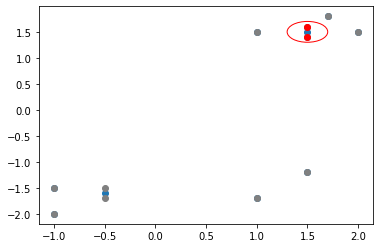

In [ ]:
#ahora nuestro nuevo z1=c
dd1=distance_matrix(c,c,p=2)
f=ar(dd1)
xy=nu(c,f)
c1=ag(xy,f,c)
gr(c1,c,f,0.2,x1,y1)

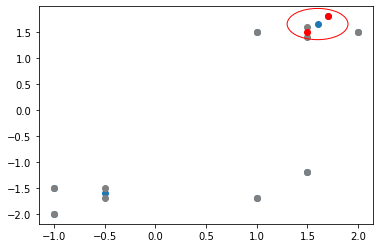

In [ ]:
#ahora nuestro nuevo c=c1
dd2=distance_matrix(c1,c1,p=2)
f=ar(dd2)
xy=nu(c1,f)
c2=ag(xy,f,c1)
gr(c2,c1,f,0.3,x1,y1)

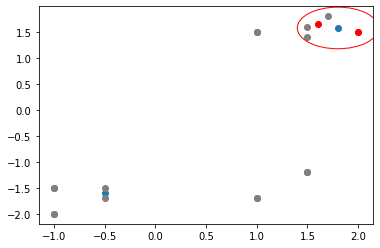

In [ ]:
#ahora nuestro nuevo c1=c2
dd3=distance_matrix(c2,c2,p=2)
f=ar(dd3)
xy=nu(c2,f)
c3=ag(xy,f,c2)
gr(c3,c2,f,0.4,x1,y1)

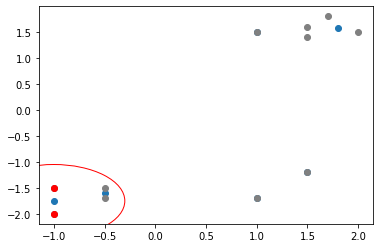

In [ ]:
#ahora nuestro nuevo c2=c3
dd4=distance_matrix(c3,c3,p=2)
f=ar(dd4)
xy=nu(c3,f)
c4=ag(xy,f,c3)
gr(c4,c3,f,0.7,x1,y1)

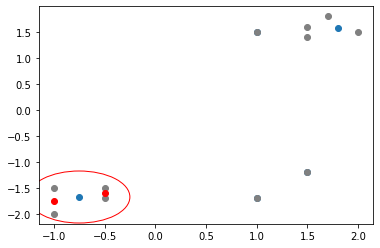

In [ ]:
#ahora nuestro nuevo c3=c4
dd5=distance_matrix(c4,c4,p=2)
f=ar(dd5)
xy=nu(c4,f)
c5=ag(xy,f,c4)
gr(c5,c4,f,0.5,x1,y1)

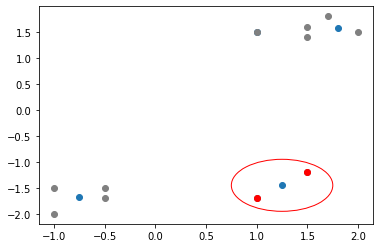

In [ ]:
#ahora nuestro nuevo c4=c5
dd6=distance_matrix(c5,c5,p=2)
f=ar(dd6)
xy=nu(c5,f)
c6=ag(xy,f,c5)
gr(c6,c5,f,0.5,x1,y1)

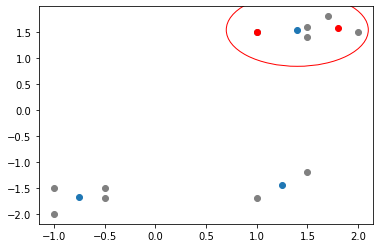

In [ ]:
#ahora nuestro nuevo c5=c6
dd7=distance_matrix(c6,c6,p=2)
f=ar(dd7)
xy=nu(c6,f)
c7=ag(xy,f,c6)
gr(c7,c6,f,0.7,x1,y1)

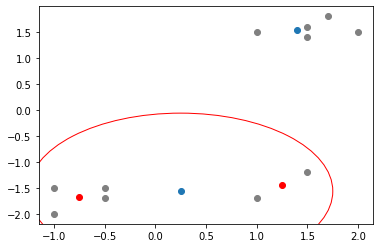

In [ ]:
#ahora nuestro nuevo c6=c7
dd8=distance_matrix(c7,c7,p=2)
f=ar(dd8)
xy=nu(c7,f)
c8=ag(xy,f,c7)
gr(c8,c7,f,1.5,x1,y1)

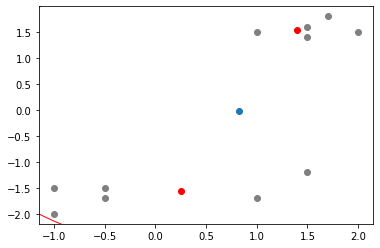

In [ ]:
#ahora nuestro nuevo c7=c8
dd9=distance_matrix(c8,c8,p=2)
f=ar(dd9)
xy=nu(c8,f)
c9=ag(xy,f,c8)
gr(c9,c8,f,2.8,x1,y1)

In [ ]:
x11=1.5
y11=1.5
x22=1.5
y22=1.5###puntos en z1[0]=(-1,-2)  y z1[2]=(-1,-1.5)
np.sqrt((x22-x11)**2+(y22-y11)**2)#lo buscamos en dd como 0,2 o 2,0

0.0

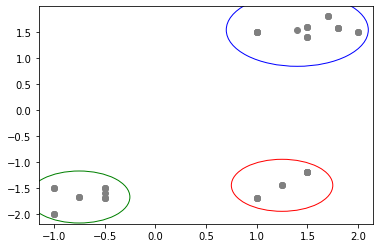

In [ ]:
def gr1(c,z1,f,r,x1,y1,co):
  plt.scatter(c[:,0],c[:,1],c='gray')
  plt.scatter(x1,y1,c='gray')
  plt.scatter(z1[int(f[0]),0],z1[int(f[0]),1],c='gray')
  plt.scatter(z1[int(f[1]),0],z1[int(f[1]),1],c='gray')
  c1=plt.Circle((c[-1,0],c[-1,1]),r,color=co,fill=False)
  ax = plt.gca()
  ax.add_artist(c1) 
f=ar(dd)
xy=nu(z1,f)
c=ag(xy,f,z1)
gr1(c7,c6,f,0.7,x1,y1,'blue')
gr1(c6,c5,f,0.5,x1,y1,'red')
gr1(c5,c4,f,0.5,x1,y1,'green')


  $$MSE=\frac {\sum_ {i=1} ^n(y_{actual} - y_{pred})^2} {n}$$


$$SM(z_k)=\frac{e^{z_k}}{\sum_{i=1}^n e^{z_i}}$$

$$H(y_r,y_p)=-y_r \cdot log \left(\frac{1}{1+e^{-y_p}}\right)-(1-y_r) \cdot log\left(1-\frac{1}{1+e^{-y_p}}\right)$$


$$f(x)=e^x+1 \ si \ x<0$$
$$f(x)=x \ si \ x \geq 0$$

$$L1(y_r,y_p)=|y_r-y_p|$$

$$PH(y_r,y_p)=\delta^2 \cdot \sqrt{1+ \left (\frac{y_r-y_p}{\delta} \right)^2}-1, \delta>0$$

$$H(y_r,y_p)=-y_r \cdot log(y_p)-(1-y_r) \cdot log(1-y_p)$$

$$H(y_r,y_p)=max(0,1-y_r \cdot y_p)$$

$$f(x)=\frac{1}{1+e^{-x}}$$

$$L2(y_r,y_p)=\sum (y_r - y_p)^2$$

$$f(x)=min(max(0,x),6)$$

$$f(x) = max(0,x)$$

$$f(x)=\frac{x}{|x|+1}$$

$$f(x)=tanh(x)== \frac {e^x-e^{-x}}{e^x+e^{-x}}$$

$$f(x)=ln(e^x+1)$$